In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import json

from src.stats import *

In [2]:
with open('./results/2023-04-12_2783.json', 'r') as f:
    data = json.loads(f.read())

data

{'/home/piotr/Studia/myProjects/ChessGamesCompression/src/../data/test_file.pgn': {'naive': {'Metrics': {'Number of bits per move': 15.388846447669977,
    'Number of bits per game': 987.4509803921569,
    'Compression ratio': 0.8711374499749235,
    'Size of source file': 97701,
    'Size of compressed file': 12590,
    'Total number of moves': 6545,
    'Total number of games': 102,
    'Distribution of results': {'1-0': 51, '0-1': 48, '1/2-1/2': 3},
    'Piece movement frequency': {'k': 767,
     'q': 754,
     'r': 908,
     'b': 1031,
     'n': 1171,
     'p': 1914},
    'Start square move frequency': {'a0': 73,
     'b0': 76,
     'c0': 39,
     'd0': 36,
     'e0': 53,
     'f0': 32,
     'g0': 62,
     'h0': 77,
     'a1': 118,
     'b1': 100,
     'c1': 59,
     'd1': 65,
     'e1': 63,
     'f1': 53,
     'g1': 111,
     'h1': 123,
     'a2': 135,
     'b2': 130,
     'c2': 104,
     'd2': 100,
     'e2': 85,
     'f2': 111,
     'g2': 123,
     'h2': 144,
     'a3': 151,
   

In [3]:
for file in data:

    print(file)

    for alg in data[file]:
        print('==============================')
        print('******************************')
        print(alg)
        print('******************************')

        for param in data[file][alg]:
            if param == 'Metrics':
                for metric in data[file][alg][param]:
                    print(metric, data[file][alg][param][metric])

            else: print(param, data[file][alg][param])
        
        print('==============================')

/home/piotr/Studia/myProjects/ChessGamesCompression/src/../data/test_file.pgn
******************************
naive
******************************
Number of bits per move 15.388846447669977
Number of bits per game 987.4509803921569
Compression ratio 0.8711374499749235
Size of source file 97701
Size of compressed file 12590
Total number of moves 6545
Total number of games 102
Distribution of results {'1-0': 51, '0-1': 48, '1/2-1/2': 3}
Piece movement frequency {'k': 767, 'q': 754, 'r': 908, 'b': 1031, 'n': 1171, 'p': 1914}
Start square move frequency {'a0': 73, 'b0': 76, 'c0': 39, 'd0': 36, 'e0': 53, 'f0': 32, 'g0': 62, 'h0': 77, 'a1': 118, 'b1': 100, 'c1': 59, 'd1': 65, 'e1': 63, 'f1': 53, 'g1': 111, 'h1': 123, 'a2': 135, 'b2': 130, 'c2': 104, 'd2': 100, 'e2': 85, 'f2': 111, 'g2': 123, 'h2': 144, 'a3': 151, 'b3': 188, 'c3': 77, 'd3': 123, 'e3': 119, 'f3': 86, 'g3': 195, 'h3': 142, 'a4': 148, 'b4': 191, 'c4': 87, 'd4': 124, 'e4': 116, 'f4': 90, 'g4': 202, 'h4': 140, 'a5': 178, 'b5': 103,

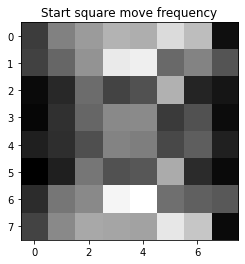

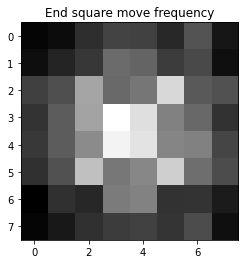

In [4]:
board = np.zeros((8,8), dtype=np.int32)

for file in data:
        
    start_freq = data[file]['rank']['Metrics'][MOVE_DISTR_START]

    for k in start_freq:
        board[ord(k[0]) - ord('a')][int(k[1])] = start_freq[k]

    plt.imshow(board, cmap='gray')
    plt.title(MOVE_DISTR_START)

    plt.show()

    end_freq = data[file]['rank']['Metrics'][MOVE_DISTR_END]

    for k in end_freq:
        board[ord(k[0]) - ord('a')][int(k[1])] = end_freq[k]

    plt.imshow(board, cmap='gray')
    plt.title(MOVE_DISTR_END)

    plt.show()